In [6]:
import warnings
warnings.filterwarnings('ignore')
import pyterrier as pt
if not pt.started():
    pt.init()

import os
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', False)

# import pyt_splade
# splade = pyt_splade.Splade()

dataset_name = 'msmarco-passage'
eval_ds_name = 'dev'
dataset = pt.get_dataset(f'irds:{dataset_name}')
eval_dataset = pt.get_dataset(f'irds:{dataset_name}/{eval_ds_name}')
topics = eval_dataset.get_topics()
qrels = eval_dataset.get_qrels()

PyTerrier 0.10.0 has loaded Terrier 5.10 (built by craigm on 2024-08-22 17:33) and terrier-helper 0.0.8



In [2]:
topics.shape

(101093, 2)

In [3]:
dataset_df = pd.DataFrame(dataset.get_corpus_iter(verbose=True))

msmarco-passage documents: 100%|██████████| 8841823/8841823 [00:39<00:00, 223736.91it/s]


In [4]:
#################### bm25 ###########################

In [7]:
bm25 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25.csv')

In [8]:
bm25 = bm25.groupby(['docid'])['docid'].count()
bm25 = bm25.to_frame('rtr_cnt').reset_index()
total = bm25['rtr_cnt'].sum() # total number of retrieved docs for 101093 queries in msmarco-passage/dev
bm25['rtr_score'] = bm25['rtr_cnt']/total # normalisation
bm25 = bm25.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores

In [6]:
bm25.head(100).

,docid,rtr_cnt,rtr_score
516221,6958226,1294,0.001280
151878,1985345,1119,0.001107
12804,169073,874,0.000865
113041,1474877,820,0.000811
35579,462225,613,0.000606


In [7]:
bm25.shape

(803333, 3)

In [9]:
####################### bm25 >> monot5 ###############################

In [8]:
# 100 docs retrieved for each query
# monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_r100.csv',index_col=1)

In [9]:
# monot5.head(5)

,qid,Unnamed: 0,docid,docno,query,text,score,rank
qid.1,,,,,,,,
2,2,1112,4339068,4339068,androgen receptor define,"The androgen receptor (AR), also known as NR3C4 (nuclear receptor subfamily 3, group C, member 4), is a type of nuclear receptor that is activated by binding either of the androgenic hormones, testosterone, or dihydrotestosterone in the cytoplasm and then translocating into the nucleus.n some cell types, testosterone interacts directly with androgen receptors, whereas, in others, testosterone is converted by 5-alpha-reductase to dihydrotestosterone, an even more potent agonist for androgen receptor activation.",-0.016371,0
2,2,1117,1001873,1001873,androgen receptor define,"The AR gene provides instructions for making a protein called an androgen receptor. Androgens are hormones (such as testosterone) that are important for normal male sexual development before birth and during puberty.Androgen receptors allow the body to respond appropriately to these hormones.The receptors are present in many of the body's tissues, where they attach (bind) to androgens. The resulting androgen-receptor complex then binds to DNA and regulates the activity of androgen-responsive genes.ndrogen receptors allow the body to respond appropriately to these hormones. The receptors are present in many of the body's tissues, where they attach (bind) to androgens. The resulting androgen-receptor complex then binds to DNA and regulates the activity of androgen-responsive genes.",-0.035911,1
2,2,1126,6920058,6920058,androgen receptor define,"The AR gene provides instructions for making a protein called an androgen receptor. Androgens are hormones (such as testosterone) that are important for normal male sexual development before birth and during puberty.Androgen receptors allow the body to respond appropriately to these hormones.ome mutations lead to an abnormally short version of the androgen receptor protein, while others result in the production of an abnormal receptor that cannot bind to androgens or to DNA. As a result, cells that are sensitive to androgens become less responsive to these hormones or unable to use these hormones at all.",-0.055052,2
2,2,1152,7496504,7496504,androgen receptor define,"Mutations in the AR gene cause androgen insensitivity syndrome. This gene provides instructions for making a protein called an androgen receptor. Androgen receptors allow cells to respond to androgens, which are hormones (such as testosterone) that direct male sexual development.Androgens and androgen receptors also have other important functions in both males and females, such as regulating hair growth and sex drive.ndrogen insensitivity syndrome is a condition that affects sexual development before birth and during puberty. People with this condition are genetically male, with one X chromosome and one Y chromosome in each cell.",-0.253432,3
2,2,1109,6285817,6285817,androgen receptor define,The term SARMS stands for “Selective Androgen Receptor Modulators .” Androgens are a class of hormones that serve as ligands that bind to cellular androgen receptors. The androgen receptor is involved in a complex signal transduction pathway that ultimately results in greater expression of specific genes.,-0.277261,4


In [10]:
from tqdm import tqdm
tqdm.pandas()

In [13]:
# obtain top 10 docs for each query
# monot5 = monot5.groupby('qid')

In [14]:
# monot5 = monot5.progress_apply(lambda x: x.sort_values('rank', ascending=True))

100%|██████████| 101092/101092 [00:53<00:00, 1894.65it/s]


In [15]:
# monot5 = monot5.groupby('qid').head(10)

In [16]:
# monot5.to_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_10.csv')

In [11]:
monot5 = pd.read_csv('/nfs/primary/retrievability-bias/results_bm25_monot5_10.csv') # 100 docs retrieved for each query.

In [12]:
monot5.head(5)

,qid,qid.1,Unnamed: 0,docid,docno,query,text,score,rank
0,2,2,1112,4339068,4339068,androgen receptor define,"The androgen receptor (AR), also known as NR3C4 (nuclear receptor subfamily 3, group C, member 4), is a type of nuclear receptor that is activated by binding either of the androgenic hormones, testosterone, or dihydrotestosterone in the cytoplasm and then translocating into the nucleus.n some cell types, testosterone interacts directly with androgen receptors, whereas, in others, testosterone is converted by 5-alpha-reductase to dihydrotestosterone, an even more potent agonist for androgen receptor activation.",-0.016371,0
1,2,2,1117,1001873,1001873,androgen receptor define,"The AR gene provides instructions for making a protein called an androgen receptor. Androgens are hormones (such as testosterone) that are important for normal male sexual development before birth and during puberty.Androgen receptors allow the body to respond appropriately to these hormones.The receptors are present in many of the body's tissues, where they attach (bind) to androgens. The resulting androgen-receptor complex then binds to DNA and regulates the activity of androgen-responsive genes.ndrogen receptors allow the body to respond appropriately to these hormones. The receptors are present in many of the body's tissues, where they attach (bind) to androgens. The resulting androgen-receptor complex then binds to DNA and regulates the activity of androgen-responsive genes.",-0.035911,1
2,2,2,1126,6920058,6920058,androgen receptor define,"The AR gene provides instructions for making a protein called an androgen receptor. Androgens are hormones (such as testosterone) that are important for normal male sexual development before birth and during puberty.Androgen receptors allow the body to respond appropriately to these hormones.ome mutations lead to an abnormally short version of the androgen receptor protein, while others result in the production of an abnormal receptor that cannot bind to androgens or to DNA. As a result, cells that are sensitive to androgens become less responsive to these hormones or unable to use these hormones at all.",-0.055052,2
3,2,2,1152,7496504,7496504,androgen receptor define,"Mutations in the AR gene cause androgen insensitivity syndrome. This gene provides instructions for making a protein called an androgen receptor. Androgen receptors allow cells to respond to androgens, which are hormones (such as testosterone) that direct male sexual development.Androgens and androgen receptors also have other important functions in both males and females, such as regulating hair growth and sex drive.ndrogen insensitivity syndrome is a condition that affects sexual development before birth and during puberty. People with this condition are genetically male, with one X chromosome and one Y chromosome in each cell.",-0.253432,3
4,2,2,1109,6285817,6285817,androgen receptor define,The term SARMS stands for “Selective Androgen Receptor Modulators .” Androgens are a class of hormones that serve as ligands that bind to cellular androgen receptors. The androgen receptor is involved in a complex signal transduction pathway that ultimately results in greater expression of specific genes.,-0.277261,4


In [13]:
monot5 = monot5.groupby(['docid'])['docid'].count()
monot5 = monot5.to_frame('rtr_cnt').reset_index()
total = monot5['rtr_cnt'].sum() # total number of retrieved docs for 101093 queries in msmarco-passage/dev
monot5['rtr_score'] = monot5['rtr_cnt']/total # normalisation
monot5 = monot5.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores


In [14]:
monot5.head(5)

,docid,rtr_cnt,rtr_score
561792,6958226,327,0.000323
326582,4019213,325,0.000321
714802,7594233,163,0.000161
95793,1147809,159,0.000157
349615,4312541,143,0.000141


In [15]:
################ splade  ##################################

In [3]:
splade = pd.read_csv('/nfs/primary/retrievability-bias/results_splade.csv') # 100 docs retrieved for each query.

NameError: name 'pd' is not defined

In [17]:
splade.columns.to_list()

['Unnamed: 0',
 'qid',
 'docid',
 'docno',
 'rank',
 'score',
 'query',
 'query_toks',
 'text']

In [4]:
splade = splade.groupby(['docid'])['docid'].count()
splade = splade.to_frame('rtr_cnt').reset_index()
total = splade['rtr_cnt'].sum()
splade['rtr_score'] = splade['rtr_cnt']/total # normalisation
splade = splade.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores

NameError: name 'splade' is not defined

In [55]:
colbert = pd.read_csv('/nfs/datasets/cxj/retrievability-bias/result_colbert.csv')
# colbert = colbert.groupby(['docid'])['docid'].count()
# colbert = colbert.to_frame('rtr_cnt').reset_index()



In [59]:
colbert = colbert.rename(columns={'0':'rtr_cnt'})

In [61]:
total = colbert['rtr_cnt'].sum()
colbert['rtr_score'] = colbert['rtr_cnt']/total # normalisation
colbert = colbert.sort_values(by='rtr_score',ascending=False) # sort by retrievablity scores

In [62]:
colbert.head(2)

,docid,rtr_cnt,rtr_score
18486,961586,15,0.000015
19792,7318236,12,0.000012


In [63]:
print(bm25.shape[0],monot5.shape[0],splade.shape[0],colbert.shape[0])

803333 888917 617193 893812


In [64]:
num_docs = max(bm25.shape[0],monot5.shape[0],splade.shape[0],colbert.shape[0])
partitions = 15 # split the retrieved docs into 15 partitions, and sum the retrivability scores for each partition.
intv = int(num_docs/partitions) # the number of docs within a partition
intv

59587

In [65]:
bm25_scores = []
for i in range(0,num_docs,intv):
    bm25_scores.append(bm25[i:i+intv]['rtr_score'].sum())

bm25_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [1]:
bm25_scores

NameError: name 'bm25_scores' is not defined

In [67]:
monot5_scores = []
for i in range(0,num_docs,intv):
    monot5_scores.append(monot5[i:i+intv]['rtr_score'].sum())

monot5_scores.append(0.0) # the retrievability scores of the reset of corpus docs are 0

In [68]:
monot5_scores

[0.14596648389531486,
 0.09260305247611825,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.058943513661358964,
 0.054108299692259616,
 0.0,
 0.0]

In [69]:
splade_scores = []
for i in range(0,num_docs,intv):
    splade_scores.append(splade[i:i+intv]['rtr_score'].sum())

# The retrievability scores of the rest of corpus docs are 0 (not retrieved), 
# (i.e., the retrievability scores are zero within the last partition.)
splade_scores.append(0.0) 

In [70]:
splade_scores

[0.32806227928738885,
 0.13209421028162194,
 0.10615176124954255,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.0210924594185552,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [71]:
colbert_scores = []
for i in range(0,num_docs,intv):
    colbert_scores.append(colbert[i:i+intv]['rtr_score'].sum())

# The retrievability scores of the rest of corpus docs are 0 (not retrieved), 
# (i.e., the retrievability scores are zero within the last partition.)
colbert_scores.append(0.0) 

In [72]:
colbert_scores

[0.13560780667306346,
 0.09812944516435365,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 0.05894275568041312,
 6.924317212863403e-06,
 0.0]

In [73]:
scale_num = max(len(bm25_scores),len(monot5_scores),len(splade_scores),len(colbert_scores))
scale_num

17

In [74]:
import numpy as np
import matplotlib.pyplot as plt

x_ticks = np.arange(1,scale_num +1)
x_ticks

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17])

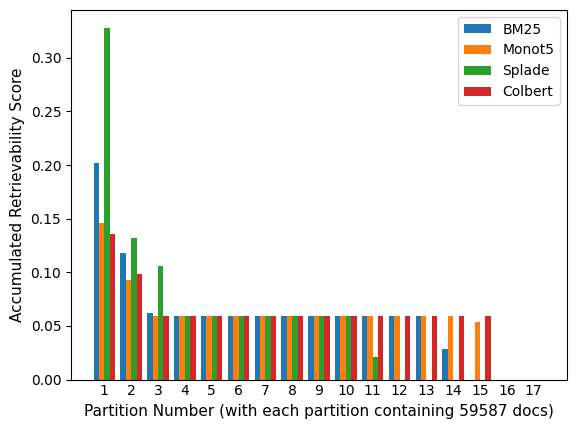

In [75]:
total_width, n = 0.8, 4
width = total_width / n
x = x_ticks
x = x - (total_width - width) / 2

plt.bar(x, bm25_scores,  width=width, label='BM25')
plt.bar(x + width, monot5_scores, width=width, label='Monot5')
plt.bar(x + 2 * width, splade_scores, width=width, label='Splade')
plt.bar(x + 3 * width, colbert_scores, width=width, label='Colbert')


plt.tick_params(axis='x',length=0)
plt.xticks(ticks=x_ticks, labels=None)

plt.xlabel(f'Partition Number (with each partition containing {intv} docs)',fontsize=11)
plt.ylabel('Accumulated Retrievability Score',fontsize=11)
plt.legend()
plt.show()

In [36]:
# verify partition 4 about why the accumulated scores are the same
partition = 4
start = partition*intv

In [37]:
splade[splade['rtr_cnt'] == 1].shape

(450294, 3)

In [38]:
splade[start:start+intv]['rtr_score'].sum()

0.05862028033592834

In [39]:
bm25[start:start+intv]['rtr_score'].sum()

0.058621034169966495

In [40]:
monot5[start:start+intv]['rtr_score'].sum()

0.058621034169966495